<a href="https://colab.research.google.com/github/utkarsh-prakash/Time-Series-Modelling/blob/main/Timeseries_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv', parse_dates = ['Quarter'],date_parser=parse)
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [4]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  61
Columns  :  3

Features : 
 ['Quarter', 'Revenue', 'Net Income']

Missing values :   Quarter       False
Revenue       False
Net Income    False
dtype: bool

Unique values :  
 Quarter       61
Revenue       61
Net Income    57
dtype: int64


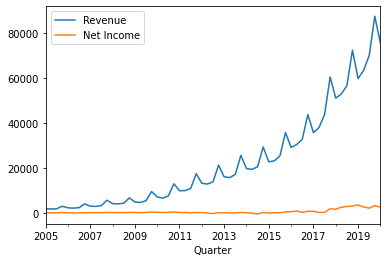

In [5]:
amazon_df=df.set_index("Quarter")
amazon_df.plot()

The decomposition of time series is a statistical task that deconstructs a time series into several components

**Trend component** - which reflects the long-term progression of the series - Trend can be positive or negative or both

**Seasonal Component** - includes cyclical component

**Noise or residual** - remainder of the time series after the other components have been removed

AR (Auto Regressive) and MA (Moving Average) model assumes time series to be stationary  and real-world data - they are often
governed by a (deterministic) trend and they might have (deterministic)
cyclical or seasonal components

# KPSS Test

Kwiatkowski-Phillips-Schmidt-Shin (KPSS), is a type of Unit root test that tests for the stationarity of a given series around a deterministic trend.
If data is not stationary over mean, it can still be stationary over trend, i.e. mean is always lying on tend line

Null hypothesis - data is stationary<br>
Alternate hypothesis - data is not stationary

In [6]:
from statsmodels.tsa.stattools import kpss

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [7]:
# c - data is stationary around a constant
# ct - data is stationary around a trend
tstest = kpss(amazon_df['Revenue'], 'ct')
tstest
# As we can see there is an dictionary at end which gives us critical values for benchmarks
# Here our null hypothesis is - data is not stationary, and we need appropriate p value to reject the null hypothesis
# critical score is increasing, i.e. the less the critical score, the easier it will be to reject the null hypothesis
# we are getting our result as 0.1700, we can see the benchmark for 2.5% as 0.176, so as p value is even less than 2.5% we cant reject the null hypothesis
# This simply means that if data is stationary around trend, there is even less than 2.5% probability that we will get a dist like amazon revenue

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



(0.170051682108309,
 0.029956931576409152,
 11,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

In [8]:
# Lets check our understanding with some synthetic data
# create synthetic data
def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

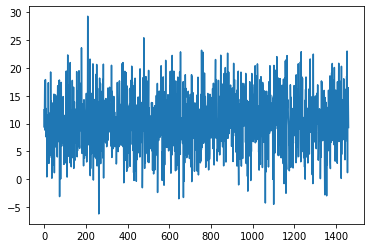

In [9]:
time = np.arange(4 * 365 + 1, dtype="float32") 
baseline = 10
slope = 0
noise_level = 5
series = baseline + trend(time, slope)
series += noise(time, noise_level, seed=42)
plt.plot(series)

In [10]:
tstest = kpss(series, 'c')
tstest
# Even though we have added noise, the critical value is almost near the 10% bench mark
# We can easily reject the null hypothesis and say that data is stationary around a constant (10 in our case)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



(0.34494103242327445,
 0.1,
 24,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

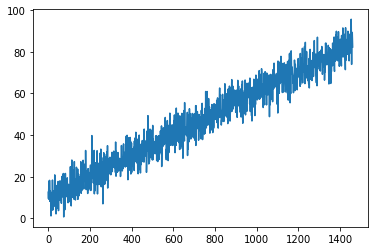

In [11]:
time = np.arange(4 * 365 + 1, dtype="float32") 
baseline = 10
slope = 0.05
noise_level = 5
series = baseline + trend(time, slope)
series += noise(time, noise_level, seed=42)
plt.plot(series)

In [12]:
tstest = kpss(series, 'c')
print(tstest)

(5.933407302898075, 0.01, 24, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



In [13]:
# Even though the data we crfeated is not stationary around a constant
# When we run the test with ct parameter we realise that it is constant around trend
tstest = kpss(series, 'ct')
print(tstest)

(0.0552562803163849, 0.1, 24, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



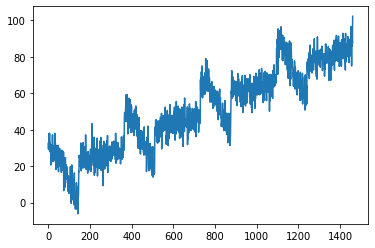

In [14]:
time = np.arange(4 * 365 + 1, dtype="float32") 
baseline = 10
slope = 0.05
amplitude = 20
noise_level = 5
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
series += noise(time, noise_level, seed=42)
plt.plot(series)

In [15]:
tstest = kpss(series, 'ct')
print(tstest)
# Even when seasonality is added, data is still stationary around trend
# Because positive and negative seasons are cancelling each other

(0.050371580183448096, 0.1, 24, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



In the kpss test, first value is critical value, 2nd is p-value itself, i.e. we can directly refer to it to see that if we are crossing the threshold.



# Decomposition

**Decomposition**<br>
Additive - Trend + cyclic + seasonality + Noise (Residual)<br>
Multiplicative - Trend x cyclic x seasonality x Noise (Residual)<br>

While doing decomposition for non-stationary data, it is better to use multiplicative model, additive for stationary.<br>
multiplicative model is used when the seasonality increases or decreases with the level of time series.

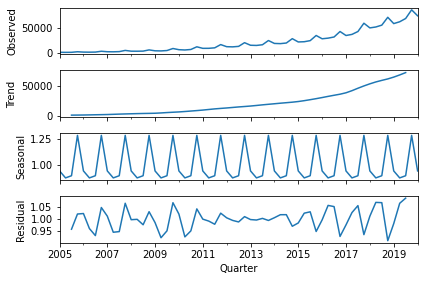

In [16]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(amazon_df['Revenue'],
                                model='multiplicative')

resplot = res.plot()

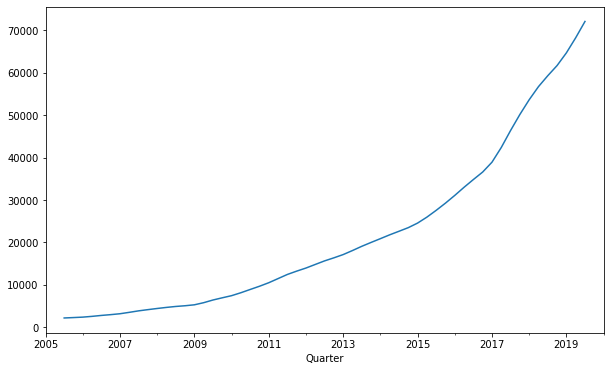

In [17]:
# For finding the trend model is doing t-1, t-2 analysis and hence we will not find data on first and last two points
plt.figure(figsize=(10,6))
res.trend.plot()

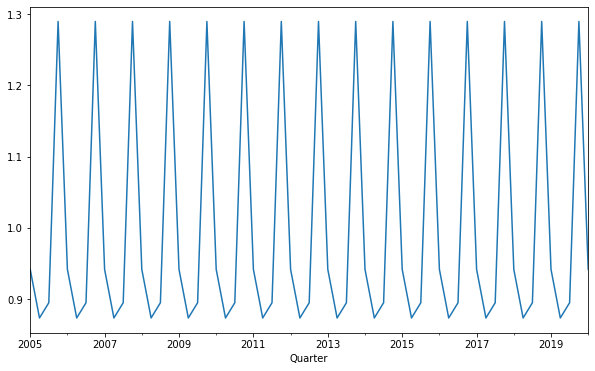

In [18]:
plt.figure(figsize=(10,6))
res.seasonal.plot()

In [19]:
print(res.observed[2])
res.trend[2]*res.seasonal[2]*res.resid[2]

69981


69980.99999999999

**What we need to do now**<br>
- All our AR and MA models works better with detrended data, i.e. data with trend removed from it.
- we can subtract the trend in case of additive model and divide the observed value with trend in case of additive model.
- Once modelling is complete and forecasting is done, we can fit a regression model to trend data and get the forecasted trend to add/ multiply with our forecasted data to match it with real time.(yet to learn)




<Figure size 720x432 with 0 Axes>

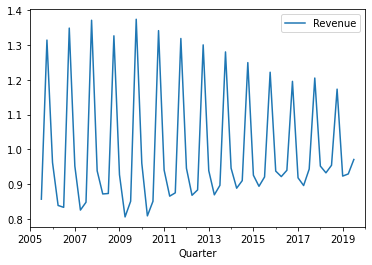

In [20]:
plt.figure(figsize=(10,6))
df = pd.DataFrame(res.observed/res.trend)
df.plot()

In [21]:
tstest = kpss(df.iloc[2:-2]['Revenue'], 'c')
tstest
# yo! null hypothesis rejected...data is stationary...modelling is good to go!

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



(0.45193604279380284,
 0.054768947071636716,
 11,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})